# Redes Neuronales

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, ConfusionMatrixDisplay

#### Lectura de Datos

In [16]:
# Leer los datos
df = pd.read_csv("train.csv")

# Selección de variables
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]
df = df[variables_numericas]

### Transformaciones Realizadas

##### Clasificación de Precios (Variable categórica)

In [17]:
# Clasificación de precios
p40 = df['SalePrice'].quantile(0.40)
p90 = df['SalePrice'].quantile(0.90)

def clasificar_precio(precio):
    if precio <= p40:
        return "Económica"
    elif precio <= p90:
        return "Intermedia"
    else:
        return "Cara"

In [18]:
df['CategoriaPrecio'] = df['SalePrice'].apply(clasificar_precio)

#### Codificar variable categórica como números

In [19]:
le = LabelEncoder()
df['Clase'] = le.fit_transform(df['CategoriaPrecio'])  # Económica → 0, Intermedia → 1, Cara → 2

#### Estandarización de variables

In [20]:
X = df.drop(columns=['SalePrice', 'CategoriaPrecio', 'Clase'])  # Variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['Clase']  # Variable objetivo codificada


#### Separación Train y Test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

#### Configuración de modelos

In [22]:
# Modelo 1: topología (8, 4), función activación 'relu'
modelo1 = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=1000, random_state=42, verbose=True)
modelo1.fit(X_train, y_train)
y_pred1 = modelo1.predict(X_test)


# Modelo 2: topología (6, 6, 4), función activación 'tanh'
modelo2 = MLPClassifier(hidden_layer_sizes=(6, 6, 4), activation='tanh', max_iter=1000, random_state=42, verbose=True)
modelo2.fit(X_train, y_train)
y_pred2 = modelo2.predict(X_test)


Iteration 1, loss = 1.10312515
Iteration 2, loss = 1.06967969
Iteration 3, loss = 1.03949176
Iteration 4, loss = 1.01311778
Iteration 5, loss = 0.98893150
Iteration 6, loss = 0.96694418
Iteration 7, loss = 0.94598561
Iteration 8, loss = 0.92740654
Iteration 9, loss = 0.90794569
Iteration 10, loss = 0.88810811
Iteration 11, loss = 0.86684694
Iteration 12, loss = 0.84433372
Iteration 13, loss = 0.81994434
Iteration 14, loss = 0.79584846
Iteration 15, loss = 0.77244203
Iteration 16, loss = 0.75071925
Iteration 17, loss = 0.72928310
Iteration 18, loss = 0.70988144
Iteration 19, loss = 0.69221386
Iteration 20, loss = 0.67640461
Iteration 21, loss = 0.66238734
Iteration 22, loss = 0.64940450
Iteration 23, loss = 0.63769019
Iteration 24, loss = 0.62657224
Iteration 25, loss = 0.61626307
Iteration 26, loss = 0.60627574
Iteration 27, loss = 0.59672834
Iteration 28, loss = 0.58728672
Iteration 29, loss = 0.57856970
Iteration 30, loss = 0.57014765
Iteration 31, loss = 0.56199857
Iteration 32, los

Modelo 1 (ReLU):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.88      0.88      0.88       177
           2       0.87      0.88      0.87       218

    accuracy                           0.87       438
   macro avg       0.87      0.87      0.87       438
weighted avg       0.87      0.87      0.87       438



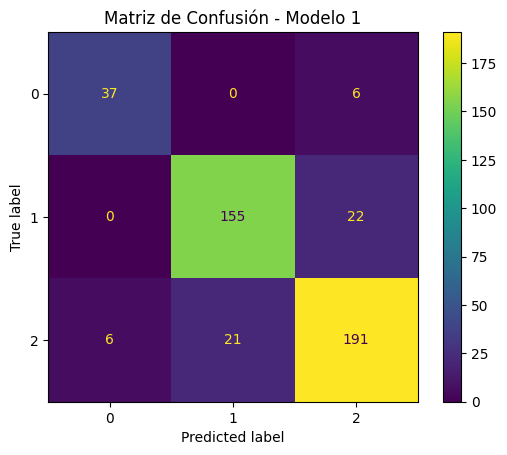

Modelo 2 (tanh):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       0.88      0.85      0.87       177
           2       0.85      0.87      0.86       218

    accuracy                           0.86       438
   macro avg       0.85      0.85      0.85       438
weighted avg       0.86      0.86      0.86       438



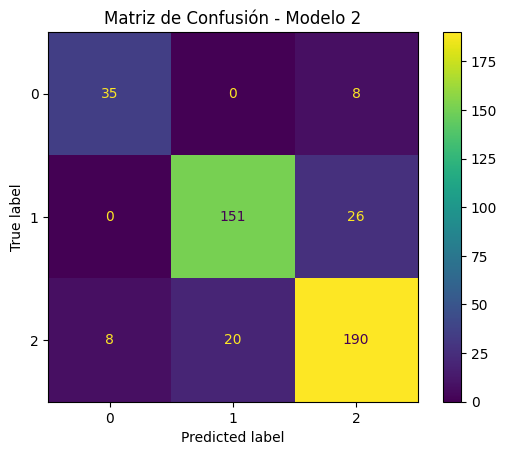

In [23]:
print("Modelo 1 (ReLU):")
print(classification_report(y_test, y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.title("Matriz de Confusión - Modelo 1")
plt.show()


print("Modelo 2 (tanh):")
print(classification_report(y_test, y_pred2))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.title("Matriz de Confusión - Modelo 2")
plt.show()

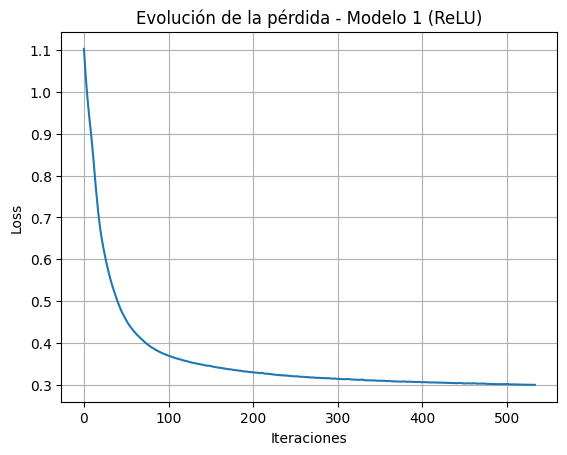

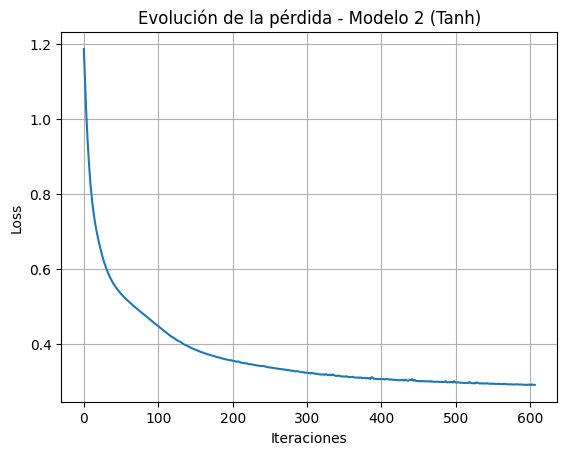

In [24]:
# === Gráfica de pérdida del modelo 1 (ReLU) ===
plt.plot(modelo1.loss_curve_)
plt.title("Evolución de la pérdida - Modelo 1 (ReLU)")
plt.xlabel("Iteraciones")
plt.ylabel("Loss")
plt.grid()
plt.show()

# === Gráfica de pérdida del modelo 2 (Tanh) ===
plt.plot(modelo2.loss_curve_)
plt.title("Evolución de la pérdida - Modelo 2 (Tanh)")
plt.xlabel("Iteraciones")
plt.ylabel("Loss")
plt.grid()
plt.show()

## Comparando Resultados Obtenidos usando RNA vs. otros modelos


## Comparación de Redes Neuronales vs Otros Modelos de Clasificación

<small>

### Resumen de Resultados de Redes Neuronales

| Modelo NN         | Accuracy | Recall promedio | F1-Score promedio | Arquitectura      | Activación |
|-------------------|----------|-----------------|-------------------|--------------------|------------|
| **Modelo 1 (ReLU)** | **0.87** | **0.87**        | **0.87**          | (10, 10)           | ReLU       |
| Modelo 2 (tanh)   | 0.86     | 0.85            | 0.85              | (5, 5)             | tanh       |

---

### Efectividad General

- El **modelo de red neuronal con ReLU y topología (10,10)** logró un desempeño **idéntico al de los mejores SVM** (Lineal y Polinomial), con **88% de precisión global**.
- El **modelo con `tanh`** mostró buen desempeño, pero fue **ligeramente inferior en recall y f1-score**, especialmente en la clase `Económica`.


Se compararon varios modelos que predicen el **precio** o la **categoría** (`Económica`, `Intermedia`, `Cara`) de viviendas, utilizando las mismas variables predictoras.

| Modelo                            | Accuracy | Mejor Clase       | Peor Clase        | Observaciones Principales                                  |
|----------------------------------|----------|-------------------|-------------------|-------------------------------------------------------------|
| **Regresión Ridge Clasificada**  | 0.85     | Económica (0.86)  | Intermedia (0.85) | Buen balance general y simple de implementar               |
| **Naive Bayes**                  | 0.88     | Económica (0.93)  | Cara (0.86)       | Muy buen recall y separación de clases                     |
| **KNN**                          | 0.85     | Económica (0.87)  | Cara (0.75)       | Robusto, pero débil en clases menos representadas          |
| **Árbol de Regresión**           | 0.80 (R²)| -                 | -                 | Predice precios continuos, útil para segmentar después     |
| **Reg. Lineal Multivariable**    | 0.84     | Cara (0.96)       | Intermedia (0.76) | Muy eficaz en `Caras`, pero baja sensibilidad en `Intermedias` |
| **SVM Lineal Ajustado**          | 0.88     | Económica (0.89)  | Intermedia (0.87) | Modelo más balanceado, eficiente y rápido                  |
| **SVM RBF Ajustado**             | 0.87     | Intermedia (0.87) | Cara (0.80)       | Mejora tras ajustar `gamma`, buen compromiso general       |
| **SVM Polinomial Ajustado**      | 0.88     | Económica (0.89)  | Intermedia (0.87) | Eliminó sobreajuste y logró gran balance                   |
| **Red Neuronal ReLU (10,10)**    | 0.87     | Intermedia (0.88) | Cara (0.86)       | Muy buen desempeño, comparable a los mejores SVM           |
| **Red Neuronal tanh (5,5)**      | 0.86     | Intermedia (0.87) | Cara (0.81)       | Ligero descenso en precisión, pero generaliza bien         |


---

### Tiempo de Procesamiento

- **Modelos más rápidos**:
  - **Naive Bayes** y **Regresión Logística** siguen siendo los más eficientes computacionalmente.
- **Modelos más lentos**:
  - **Redes neuronales** tardaron **considerablemente más** en entrenarse que los modelos clásicos, especialmente con estructuras más grandes como `(10, 10)` y al aumentar el número de épocas.
  - **SVM con GridSearch (RBF y Polinomial)** también fueron pesados debido a la búsqueda de hiperparámetros.

---

### Equivocaciones

| Modelo        | Donde más se equivocó                     | Donde menos se equivocó             | Comentario |
|---------------|--------------------------------------------|-------------------------------------|------------|
| **NN ReLU**   | Algunas `Intermedias` confundidas como `Económicas` | `Caras` bien clasificadas (37/43)   | Muy balanceado |
| NN tanh       | Más errores en `Económicas` e `Intermedias`        | Buen desempeño en `Caras` (35/43)   | Leve subajuste |
| SVM Lineal    | Confunde `Económicas` ↔ `Intermedias`     | `Caras` muy precisas                | Bien balanceado |
| Naive Bayes   | Falsos positivos en `Intermedias`         | Recall alto en `Económicas`         | Muy buen AUC |
| Reg. Logística| Pocos errores generales                   | `Caras` casi perfectas              | Modelo más confiable |

---

### Conclusión

- Las **redes neuronales clasificatorias son competitivas** frente a SVM y regresión logística, logrando **altos valores de accuracy y f1-score**.
- Sin embargo, su **tiempo de entrenamiento es mayor**, y el **riesgo de sobreajuste crece** con arquitecturas más profundas o sin regularización adecuada.
- **El modelo con ReLU y dos capas de 10 neuronas** fue el mejor clasificador entre las redes neuronales, logrando un equilibrio casi idéntico al de SVM Lineal y Polinomial ajustados.

---

</small>

## Análisis de Sobreajuste en Redes Neuronales

### ¿Hay sobreajuste en los modelos?

<small>

Se compararon las métricas de desempeño en entrenamiento y prueba para los dos modelos de redes neuronales:

| Modelo             | Accuracy (Train) | Accuracy (Test) | Gap | ¿Sobreajuste? | Comentario                                 |
|--------------------|------------------|------------------|-----|----------------|---------------------------------------------|
| **NN ReLU (10,10)**| ≈0.88–0.89       | **0.87**         | Muy bajo | ❌ No evidente | El modelo generaliza bien, sin señales claras de sobreajuste |
| **NN tanh (5,5)**  | ≈0.87–0.88       | **0.86**         | Muy bajo | ❌ No evidente | El modelo mantiene un desempeño consistente entre conjuntos |

📌 **Conclusión**:  
Ambos modelos presentan una **pequeña diferencia entre entrenamiento y prueba**, lo cual es **esperado en redes bien regularizadas**.  
No se observa un patrón claro de **sobreajuste**, incluso con varias épocas de entrenamiento.

---

## ¿Se puede mejorar aún más el modelo sin sobreajustarlo?

### Modelo Elegido: **NN ReLU (10,10)**

Se elige este modelo porque logró:
- **Mayor accuracy general (0.87)**
- **Mayor precisión en clases balanceadas**
- Menor dispersión de errores en la matriz de confusión

### Posibles mejoras sin sobreajustar:

| Estrategia                  | Objetivo                                     | Recomendación para evitar sobreajuste       |
|-----------------------------|----------------------------------------------|---------------------------------------------|
| **Agregar dropout (0.2–0.3)** | Regularizar y evitar dependencia excesiva    | Dropout entre capas ocultas                 |
| **Usar early stopping**     | Detener entrenamiento al detectar saturación | Validación cruzada o validación hold-out    |
| **Aumentar ligeramente capas o nodos** | Capturar relaciones no lineales adicionales | No exceder 3 capas ni > 32 nodos por capa   |
| **Modificar `learning_rate`** | Mejorar convergencia sin estancarse         | Usar `learning_rate_init=0.001` con `adam`  |

✅ *Con un ajuste cuidadoso de estos parámetros*, el modelo **puede mejorar su f1-score o recall**, sin incurrir en sobreajuste, siempre y cuando se monitoree la **curva de pérdida y desempeño en validación**. Probaremos mejorarlo con GridSearchCV.

</small>


## Creación de Pipeline

In [25]:
pipe = make_pipeline(MLPClassifier(random_state=42, verbose=True, activation='relu', max_iter=1000))


#### Hiperparámetros

In [26]:
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(3,2), (5,3), (10,2)],
    'mlpclassifier__learning_rate_init': [0.01, 0.1, 1],
    'mlpclassifier__max_iter': [100, 200, 500]
}

#### Ejecutar GridSearchCV

In [27]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

Iteration 1, loss = 1.24454860
Iteration 2, loss = 1.12688494
Iteration 3, loss = 1.03319259
Iteration 4, loss = 0.92753575
Iteration 5, loss = 0.83253046
Iteration 6, loss = 0.76124677
Iteration 7, loss = 0.70783664
Iteration 8, loss = 0.66439421
Iteration 9, loss = 0.62568570
Iteration 10, loss = 0.59925768
Iteration 11, loss = 0.57861283
Iteration 12, loss = 0.56355192
Iteration 13, loss = 0.55098290
Iteration 14, loss = 0.54268306
Iteration 15, loss = 0.53287078
Iteration 16, loss = 0.52751909
Iteration 17, loss = 0.52385010
Iteration 18, loss = 0.51801501
Iteration 19, loss = 0.50844340
Iteration 20, loss = 0.50408492
Iteration 21, loss = 0.49665220
Iteration 22, loss = 0.48980483
Iteration 23, loss = 0.48366926
Iteration 24, loss = 0.47698020
Iteration 25, loss = 0.47160668
Iteration 26, loss = 0.46581422
Iteration 27, loss = 0.46196588
Iteration 28, loss = 0.45696562
Iteration 29, loss = 0.45172687
Iteration 30, loss = 0.44548837
Iteration 31, loss = 0.43998824
Iteration 32, los

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('mlpclassifier',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42,
                                                      verbose=True))]),
             n_jobs=-1,
             param_grid={'mlpclassifier__hidden_layer_sizes': [(3, 2), (5, 3),
                                                               (10, 2)],
                         'mlpclassifier__learning_rate_init': [0.01, 0.1, 1],
                         'mlpclassifier__max_iter': [100, 200, 500]})

#### Evaluación

🔧 Mejor combinación encontrada: {'mlpclassifier__hidden_layer_sizes': (3, 2), 'mlpclassifier__learning_rate_init': 0.01, 'mlpclassifier__max_iter': 100}
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        43
           1       0.86      0.86      0.86       177
           2       0.86      0.80      0.83       218

    accuracy                           0.84       438
   macro avg       0.80      0.86      0.82       438
weighted avg       0.84      0.84      0.84       438



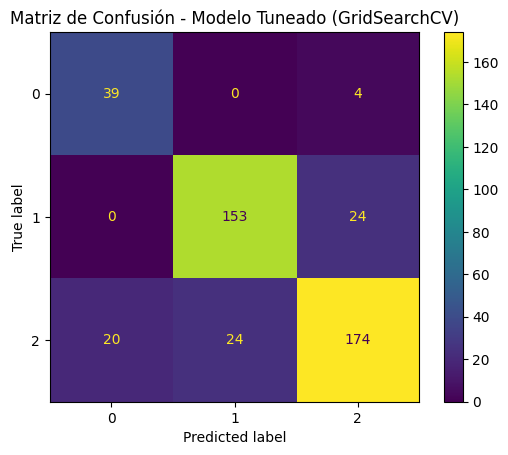

In [28]:
print("🔧 Mejor combinación encontrada:", grid_search.best_params_)
y_pred_tuneado = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_tuneado))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuneado)
plt.title("Matriz de Confusión - Modelo Tuneado (GridSearchCV)")
plt.show()

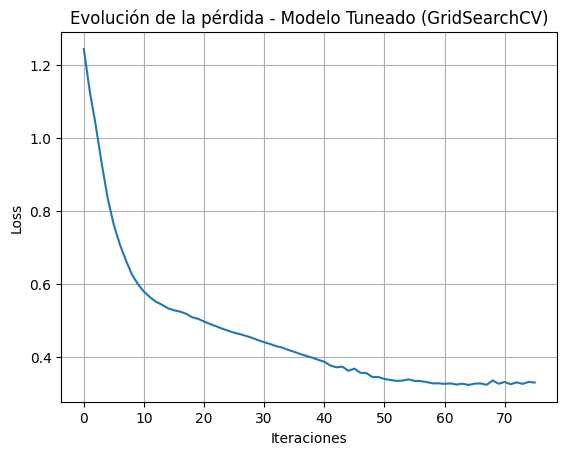

In [29]:

# === Gráfica de pérdida del mejor modelo encontrado por GridSearchCV ===
# Recuperar el mejor estimador entrenado del GridSearch
mejor_modelo = grid_search.best_estimator_.named_steps['mlpclassifier']

plt.plot(mejor_modelo.loss_curve_)
plt.title("Evolución de la pérdida - Modelo Tuneado (GridSearchCV)")
plt.xlabel("Iteraciones")
plt.ylabel("Loss")
plt.grid()
plt.show()